# CNN with Keras by bgo - Second Try

## 1. Create dataset

In [1]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로드
data_train = pd.read_csv('../data/fashion-mnist_train.csv')
data_test = pd.read_csv('../data/fashion-mnist_test.csv')

print('학습 데이터 크기 :', data_train.shape)
print('테스트 데이터 크기 :', data_test.shape)

학습 데이터 크기 : (60000, 785)
테스트 데이터 크기 : (10000, 785)


In [9]:
# 입력과 라벨 데이터로 분리
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# 테스트 데이터도 분리
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [10]:
# 학습/검증 데이터셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [11]:
# 입력 이미지의 크기
img_rows, img_cols = 28, 28    
input_shape = (img_rows, img_cols, 1)

# 1차원 데이터를 2차원 이미지 데이터로 변환
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# 0-1 사이의 값으로 정규화
X_train = X_train.astype('float32'); X_train /= 255
X_test = X_test.astype('float32'); X_test /=255
X_val = X_val.astype('float32'); X_val /= 255

In [15]:
# 최종 데이터 크기
print('X_train의 크기 :', X_train.shape, ', X_val의 크기 :', X_val.shape, ', X_test의 크기 :', X_test.shape)
print('y_train의 크기 :', y_train.shape, ', y_val의 크기 :', y_val.shape, ', y_test의 크기 :', y_test.shape)

X_train의 크기 : (48000, 28, 28, 1) , X_val의 크기 : (12000, 28, 28, 1) , X_test의 크기 : (10000, 28, 28, 1)
y_train의 크기 : (48000, 10) , y_val의 크기 : (12000, 10) , y_test의 크기 : (10000, 10)


## 2. Modeling

In [16]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [19]:
# 파라미터 설정
batch_size = 256    # 배치 크기
num_classes = 10    # 라벨 개수
epochs=50           # epoch 수

In [20]:
model = Sequential()

###################### 모델 설계 ######################
# Conv Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

# 데이터 평탄화
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Dense Layer 2
model.add(Dense(num_classes, activation='softmax'))
#########################################################

# 모델 컴파일
# - 최적화 알고리즘: Adam
# - 비용 함수: Categorical CrossEntropy
# - 평가 지표: 정확도
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)        

## 3. Training

In [22]:
# 모델 학습
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                   verbose=1, validation_data=(X_val, y_val))
# 모델 성능 평가
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 13s 68ms/step - loss: 0.8359 - accuracy: 0.6882 - val_loss: 0.5030 - val_accuracy: 0.8161
Epoch 2/50
188/188 [==============================] - 12s 66ms/step - loss: 0.5202 - accuracy: 0.8079 - val_loss: 0.4126 - val_accuracy: 0.8489
Epoch 3/50
188/188 [==============================] - 12s 64ms/step - loss: 0.4536 - accuracy: 0.8324 - val_loss: 0.3752 - val_accuracy: 0.8630
Epoch 4/50
188/188 [==============================] - 13s 68ms/step - loss: 0.4050 - accuracy: 0.8519 - val_loss: 0.3393 - val_accuracy: 0.8762
Epoch 5/50
188/188 [==============================] - 13s 67ms/step - loss: 0.3766 - accuracy: 0.8647 - val_loss: 0.3244 - val_accuracy: 0.8821
Epoch 6/50
188/188 [==============================] - 13s 69ms/step - loss: 0.3551 - accuracy: 0.8711 - val_loss: 0.3011 - val_accuracy: 0.8889
Epoch 7/50
188/188 [==============================] - 13s 71ms/step - loss: 0.3379 - accuracy: 0.8775 - val_loss: 0.2929 - val_accuracy:

In [23]:
print('Test Loss :', score[0])
print('Test Accuracy :', score[1])

Test Loss : 0.19989098608493805
Test Accuracy : 0.9277999997138977


## 4. Results

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

### 4.1. Accuracy and Loss

In [25]:
# 정확도
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']

# 손실함수 값
loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수
epochs = range(len(accuracy))

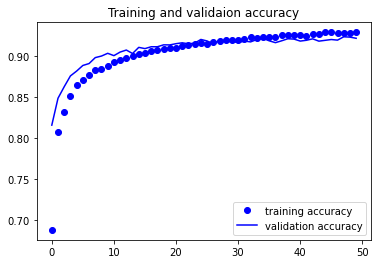

In [26]:
# epoch에 따른 정확도의 변화 시각화
plt.plot(epochs, accuracy, 'bo', label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validaion accuracy')
plt.legend()
plt.show()

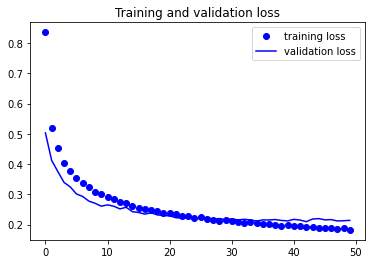

In [27]:
# epoch에 따른 손실함수 값의 변화 시각화
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 4.2. Classification Report

In [39]:
# 테스트 데이터의 라벨 예측
predicted_classes = model.predict_classes(X_test)

# 맞춘/틀린 데이터의 인덱스 추출
y_true = data_test.iloc[:, 0]
corrects = np.where(predicted_classes==y_true)[0]
incorrects = np.where(predicted_classes!=y_true)[0]

In [40]:
from sklearn.metrics import classification_report

# 각 클래스별 정밀도, 재현율, F1스코어
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88      1000
     Class 1       1.00      0.99      0.99      1000
     Class 2       0.88      0.89      0.89      1000
     Class 3       0.93      0.95      0.94      1000
     Class 4       0.90      0.88      0.89      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.80      0.76      0.78      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



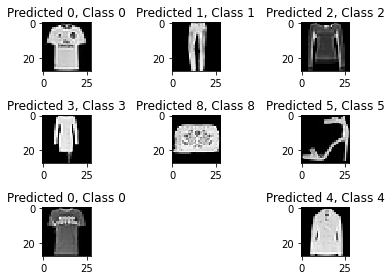

In [41]:
# 맞춘 예측의 이미지 데이터를 시각화
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

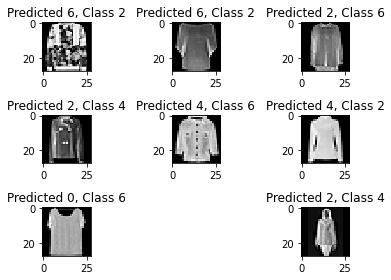

In [42]:
# 틀린 예측의 이미지 데이터를 시각화
for i, incorrect in enumerate(incorrects[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

### 4.3. What Activations Look Like

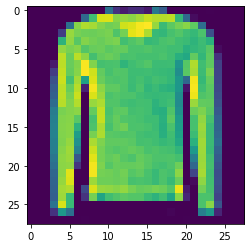

In [43]:
# 임의로 1개의 데이터 추출
test_im = X_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()

In [46]:
from tensorflow.keras import models

# Convolution Layer의 활성화 값만 뽑기 위해
# 학습된 모델의 완전연결계층 전까지의 Layer까지 추출
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)         

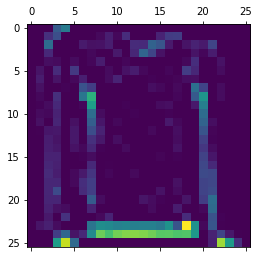

In [56]:
# 입력 데이터 1개를 신경망에 흘려보냄
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))
# 첫 번째 Layer를 지나고 나서의 활성화 값
first_layer_activation = activations[0]
# 여러 개의 채널 중 3번째 채널의 활성화 값을 시각화
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

In [53]:
layer_names = []
# 마지막 Dense 층 빼고 Layer 이름 추출
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
layer_names

['conv2d_6',
 'max_pooling2d_4',
 'dropout_8',
 'conv2d_7',
 'max_pooling2d_5',
 'dropout_9',
 'conv2d_8',
 'dropout_10',
 'flatten_2',
 'dense_2',
 'dropout_11']

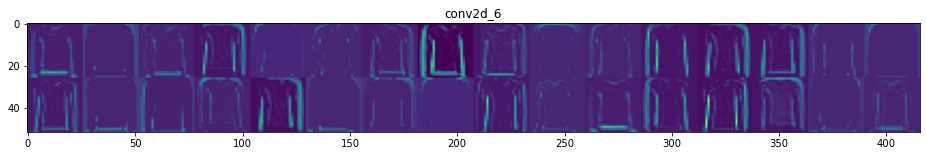

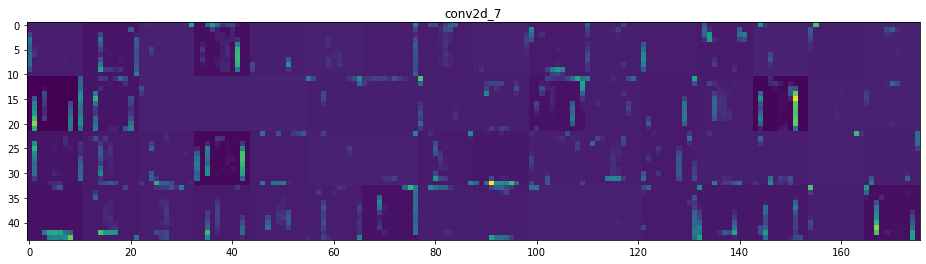

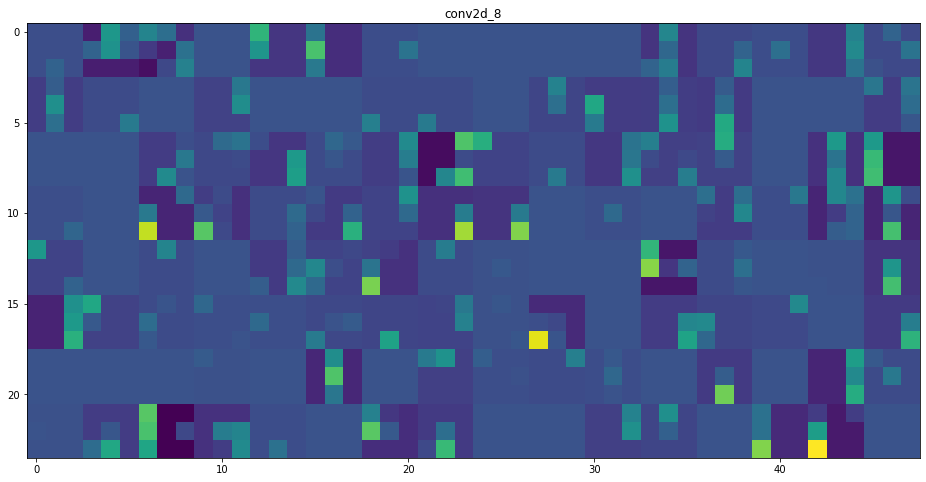

In [57]:
images_per_row = 16    # 한 줄당 시각화할 이미지 개수
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size*n_cols, images_per_row*size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row+row]
                channel_image -= channel_image.mean()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                
                display_grid[col*size: (col+1)*size, row*size: (row+1)*size] = channel_image
                
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')